# Final Project: Analyzing Iranian Education 
#### Kiana Johnson: CDS-303

In [1]:
# importing necessary packages

# data analysis & modeling
import pandas as pd
import numpy as np
import statsmodels.api as sm


# data visuals
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd

## 2011 Iran Census Dataset Exploration & Visuals

In [2]:
# loading in dataset for iranian census in 2011
census = pd.read_excel('census.xlsx') # basic population and demographic data by province in iran

In [3]:
# learning more about the census dataset
print(census.head()) 
print(census.isnull().sum()) # no null values
print(census.describe())

                    province  population  total_male  total_female     m0_4  \
0                      Total    79926270    40498442      39427828  3649800   
1                     Alborz     2712400     1376335       1336065   106034   
2                    Ardebil     1270420      650255        620165    56614   
3                    Bushehr     1163400      620722        542678    59952   
4  Chaharmahal & Bakhtiyari       947763      482356        465407    48365   

      m5_9   m10_14   m15_19   m20_24   m25_29  ...   f55_59   f60_64  f65_69  \
0  3286030  2911423  2785688  3236975  4143445  ...  1680659  1289910  902554   
1   100302    91688    84049    97318   139156  ...    59748    44888   30225   
2    52592    46553    44954    56695    68838  ...    26077    20244   14445   
3    52958    42910    39459    53318    75998  ...    17788    15353   11078   
4    41620    36531    33444    40216    51671  ...    17296    14120   10600   

   f70_74  f75_79  f80_84  f85_89  f90

Heatmap for Population Distribution by Province:

provinces in shapefile but not in census: {'Chahar Mahall and Bakhtiari', 'Kohgiluyeh and Buyer Ahmad', 'Razavi Khorasan', 'West Azarbaijan', 'Hamadan', 'East Azarbaijan'}
provinces in census but not in shapefile: {'West Azarbayejan.', 'Hamedan', 'Chaharmahal & Bakhtiyari ', 'East Azarbayejan', 'Kohgiluyeh & Boyerahmad ', 'Total', 'Khorasan-e-Razavi'}
['Alborz' 'Ardebil' 'Bushehr' 'Chaharmahal & Bakhtiyari '
 'East Azarbayejan' 'Esfahan' 'Fars' 'Gilan' 'Golestan' 'Hamedan'
 'Hormozgan' 'Ilam' 'Kerman' 'Kermanshah' 'Khuzestan'
 'Kohgiluyeh & Boyerahmad ' 'Kordestan' 'Lorestan' 'Markazi' 'Mazandaran'
 'North Khorasan' 'Qazvin' 'Qom' 'Khorasan-e-Razavi' 'Semnan'
 'Sistan and Baluchestan' 'South Khorasan' 'Tehran' 'West Azarbayejan.'
 'Yazd' 'Zanjan']


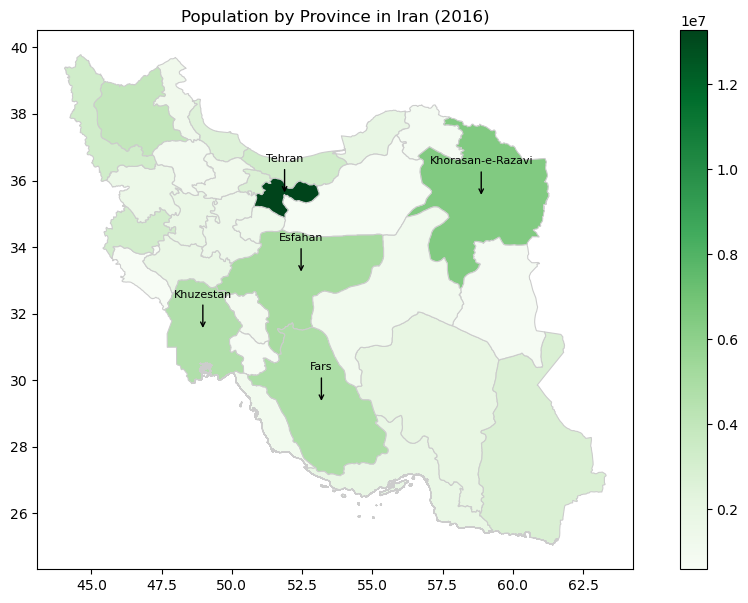

In [4]:
# loading the shapefile of iran with its provinces
shapefile_path = 'shapezip/IRN_adm1.shp'
gdf_provinces = gpd.read_file(shapefile_path)

# displaying unique values in the 'NAME_1' column that contains the province names in the shape file
unique_shapefile = gdf_provinces['NAME_1'].unique()

# displaying unique values in the 'province' column of the census data
unique_census = census['province'].unique()

# printing the differences in spellings of provinces because they are phonetic from farsi (persian), and don't match up.
shapefile_not_census = set(unique_shapefile) - set(unique_census)
census_not_shapefile = set(unique_census) - set(unique_shapefile)

print("provinces in shapefile but not in census:", shapefile_not_census)
print("provinces in census but not in shapefile:", census_not_shapefile)

# connecting the same province names between the shapefile and the census data
province_mapping = {
    'Kohgiluyeh and Buyer Ahmad': 'Kohgiluyeh & Boyerahmad ',
    'East Azarbaijan': 'East Azarbayejan',
    'Chahar Mahall and Bakhtiari': 'Chaharmahal & Bakhtiyari ',
    'Razavi Khorasan': 'Khorasan-e-Razavi',
    'Hamadan': 'Hamedan',
    'West Azarbaijan': 'West Azarbayejan.'
}

# updating the 'NAME_1' column in the shapefile to match the census data
gdf_provinces['NAME_1'] = gdf_provinces['NAME_1'].replace(province_mapping)
unique_shapefile_provinces = gdf_provinces['NAME_1'].unique()
print(unique_shapefile_provinces)

# combining census data with the shapefile using 'NAME_1' as the province column
merged_data = gdf_provinces.merge(census, how='left', left_on='NAME_1', right_on='province')

# plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_data.plot(column='population', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# label the names of the top 5 province populations with arrows
for idx, row in merged_data.nlargest(5, 'population').iterrows():
    color = 'black'
    ax.annotate(row['NAME_1'], 
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                xytext=(row.geometry.centroid.x, row.geometry.centroid.y + 1),
                ha='center', color=color, fontsize=8,
                arrowprops=dict(facecolor=color, arrowstyle='->'))

ax.set_title('Population by Province in Iran (2016)')
plt.show()

## Islamic Azad University Dataset Exploration & Visuals

In [5]:
# extracting columns of interest turning it into a data dictionary, and then converting to a dataframe.
# since the dataset is smaller, it is easier to copy and paste from the original excel file.
# this is because the original file has many stacked columns without individual observations as rows, making it difficult to analyze.

data = {
    'Academic year and broad field of study': ['1996-97', '2001-02', '2002-03',
                                              '2003-04', '2004-05', '2005-06',
                                              '2006-07'],
    'All degrees Both sexes': [613468, 806639, 864190, 968206, 1098491, 1197521, 1289637],
    'All degrees Male': [362872, 416571, 428755, 486616, 568498, 622706, 696199],
    'All degrees Female': [250596, 390068, 435435, 481590, 529993, 574815, 593438],
    'Bachelor’s Both sexes': [517522, 568934, 594205, 634191, 676290, 731155, 779308],
    'Bachelor’s Male': [305478, 285515, 281040, 301793, 329313, 358409, 396049],
    'Bachelor’s Female': [212044, 283419, 313165, 332398, 346977, 372746, 383259],
    'Master’s Both sexes': [18070, 24974, 27617, 27486, 30140, 35216, 41464],
    'Master’s Male': [13209, 15929, 17157, 17218, 18811, 21672, 24718],
    'Master’s Female': [4861, 9045, 10460, 10268, 11329, 13544, 16746],
    'Professional and speciality doctorate Both sexes': [10151, 12524, 12462, 14576, 13598, 13888, 15419],
    'Professional and speciality doctorate Male': [6542, 7708, 7366, 8478, 7819, 7881, 8563],
    'Professional and speciality doctorate Female': [3609, 4816, 5096, 6098, 5779, 6007, 6856],
    'Associate’s Both sexes': [67725, 200207, 229906, 291953, 378463, 417262, 453446],
    'Associate’s Male': [37643, 107419, 123192, 159127, 212555, 234744, 266869],
    'Associate’s Female': [30082, 92788, 106714, 132826, 165908, 182518, 186577]
} # islamic azad university student data (gender, degree, population)

# converting into a dataframe
azad = pd.DataFrame(data)

# renaming the columns for easier access
azaduni = azad.rename(columns={
    'Academic year and broad field of study': 'year',
    'All degrees Both sexes': 'all_degrees_total',
    'All degrees Male': 'all_degrees_male',
    'All degrees Female': 'all_degrees_female',
    'Bachelor’s Both sexes': 'bachelor_total',
    'Bachelor’s Male': 'bachelor_male',
    'Bachelor’s Female': 'bachelor_female',
    'Master’s Both sexes': 'master_total',
    'Master’s Male': 'master_male',
    'Master’s Female': 'master_female',
    'Professional and speciality doctorate Both sexes': 'doctorate_total',
    'Professional and speciality doctorate Male': 'doctorate_male',
    'Professional and speciality doctorate Female': 'doctorate_female',
    'Associate’s Both sexes': 'associate_total',
    'Associate’s Male': 'associate_male',
    'Associate’s Female': 'associate_female'
})

# displaying the dataframe to ensure everything is positioned properly and learn about it
print(census.head()) 
print(census.isnull().sum())
print(census.describe())

                    province  population  total_male  total_female     m0_4  \
0                      Total    79926270    40498442      39427828  3649800   
1                     Alborz     2712400     1376335       1336065   106034   
2                    Ardebil     1270420      650255        620165    56614   
3                    Bushehr     1163400      620722        542678    59952   
4  Chaharmahal & Bakhtiyari       947763      482356        465407    48365   

      m5_9   m10_14   m15_19   m20_24   m25_29  ...   f55_59   f60_64  f65_69  \
0  3286030  2911423  2785688  3236975  4143445  ...  1680659  1289910  902554   
1   100302    91688    84049    97318   139156  ...    59748    44888   30225   
2    52592    46553    44954    56695    68838  ...    26077    20244   14445   
3    52958    42910    39459    53318    75998  ...    17788    15353   11078   
4    41620    36531    33444    40216    51671  ...    17296    14120   10600   

   f70_74  f75_79  f80_84  f85_89  f90

Stacked Area Chart showing Azad University Student Population by Gender Over Time:

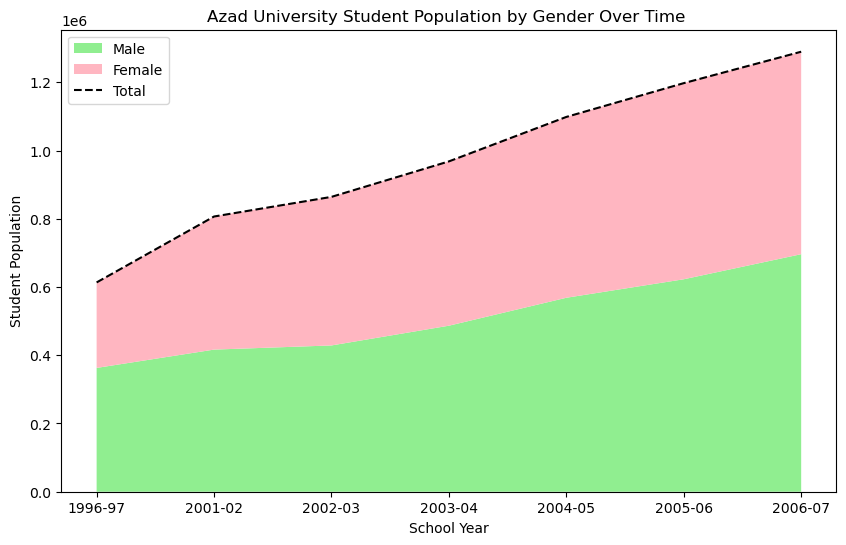

In [6]:
# defining the variables i need from the data to create my chart
years = azaduni['year']
all_degrees_male = azaduni['all_degrees_male']
all_degrees_female = azaduni['all_degrees_female']
all_degrees_total = azaduni['all_degrees_total']

plt.figure(figsize=(10, 6))

# setting labels and aesthetics for the stack plot
plt.stackplot(years, all_degrees_male, all_degrees_female, labels=['Male', 'Female'], colors=['lightgreen', 'lightpink'])
plt.plot(years, all_degrees_total, color='black', linestyle='--', label='Total')

plt.xlabel('School Year')
plt.ylabel('Student Population')
plt.title('Azad University Student Population by Gender Over Time ')
plt.legend()

plt.show()

Stacked Bar Chart showing Total Degrees Obtained by Education Level at Azad University:

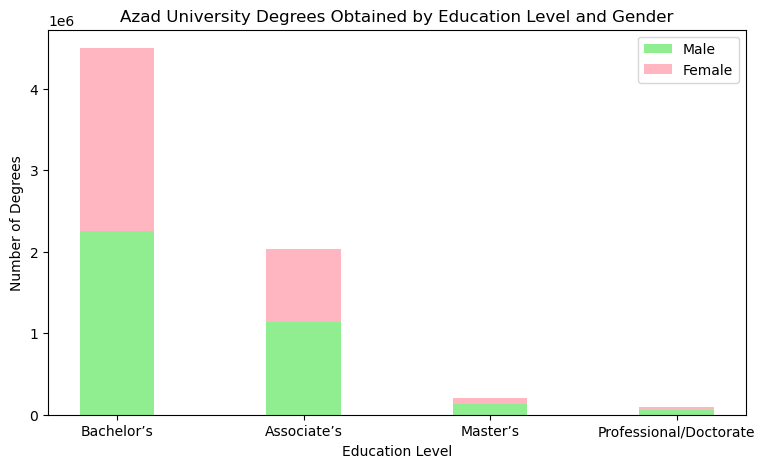

In [7]:
plt.figure(figsize=(9, 5))

# defining the levels of education i need for my plot
education_levels = ['Bachelor’s', 'Associate’s', 'Master’s', 'Professional/Doctorate']

# extracting total male population and total female population variables
male_totals = azaduni[['bachelor_male', 'associate_male', 'master_male', 'doctorate_male']].sum()
female_totals = azaduni[['bachelor_female', 'associate_female', 'master_female', 'doctorate_female']].sum()

# creating stacked bars for the male and female totals
bar_width = 0.4
bar_positions = range(len(education_levels))

# setting labels and aesthetics for the bar chart
plt.bar(bar_positions, male_totals, label='Male', color='lightgreen', width=bar_width)
plt.bar(bar_positions, female_totals, bottom=male_totals, label='Female', color='lightpink', width=bar_width)

plt.xlabel('Education Level')
plt.ylabel('Number of Degrees')
plt.title('Azad University Degrees Obtained by Education Level and Gender')
plt.legend()
plt.xticks(bar_positions, education_levels)

plt.show()

## Iranian Literacy by Region Dataset Exploration & Visuals

In [8]:
# loading in iran literacy by gender and region dataset
literacy = pd.read_excel('iranliteracyregion.xlsx')

# learning more about the dataset
print(literacy.head())

# renaming the columns for easier access
column_mapping = {
    # columns telling us the literacy of the whole country based on gender
    'Total_bw': 'total_both_whole',
    'Literate_bw': 'literate_both_whole',
    'lliterat_bw': 'illiterate_both_whole',
    'Not Declared_bw': 'unknown_both_whole',
    'Total_mw': 'total_male_whole',
    'Literate_mw': 'literate_male_whole',
    'lliterat_mw': 'illiterate_male_whole',
    'Not Declared_mw': 'unknown_male_whole',
    'Total_fw': 'total_female_whole',
    'Literate_fw': 'literate_female_whole',
    'lliterat_fw': 'illiterate_female_whole',
    'Not Declared_fw': 'unknown_female_whole',
    
    # columns telling us the literacy of urban parts of the country based on gender
    'Total_bu': 'total_both_urban',
    'Literate_bu': 'literate_both_urban',
    'lliterat_bu': 'illiterate_both_urban',
    'Not Declared_bu': 'unknown_both_urban',
    'Total_mu': 'total_male_urban',
    'Literate_mu': 'literate_male_urban',
    'lliterat_mu': 'illiterate_male_urban',
    'Not Declared_mu': 'unknown_male_urban',
    'Total_fu': 'total_female_urban',
    'Literate_fu': 'literate_female_urban',
    'lliterat_fu': 'illiterate_female_urban',
    'Not Declared_fu': 'unknown_female_urban',
    
    # columns telling us the literacy of rural parts of the country based on gender
    'Total_br': 'total_both_rural',
    'Literate_br': 'literate_both_rural',
    'lliterat_br': 'illiterate_both_rural',
    'Not Declared_br': 'unknown_both_rural',
    'Total_mr': 'total_male_rural',
    'Literate_mr': 'literate_male_rural',
    'lliterat_mr': 'illiterate_male_rural',
    'Not Declared_mr': 'unknown_male_rural',
    'Total_fr': 'total_female_rural',
    'Literate_fr': 'literate_female_rural',
    'lliterat_fr': 'illiterate_female_rural',
    'Not Declared_fr': 'unknown_female_rural',
}

literacy.rename(columns=column_mapping, inplace=True)

# displaying only the first row of data because it is the only row i need for my analysis. the original dataset is separated by age group, but that is less important to me than the total.
literacy_first_row = literacy.head(1)
print(literacy_first_row)

# saving the first row as the official dataset
literacy_first_row.to_excel('iranliteracy_first_row.xlsx', index=False)

   Total_bw  Literate_bw  lliterat_bw  Not Declared_bw  Total_mw  Literate_mw  \
0  67681876     57361682      9719712           600482  34079833     30126120   
1   4437473      4079006       236538           121929   2273781      2092550   
2   5671435      5544525       112104            14806   2888388      2827437   
3   6607043      6405868       181316            19859   3347436      3250205   
4   8414497      8065293       302037            47167   4201575      4042430   

   lliterat_mw  Not Declared_mw  Total_fw  Literate_fw  ...  lliterat_br  \
0      3576392           377321  33602043     27235562  ...      4559723   
1       119249            61982   2163692      1986456  ...        94170   
2        53524             7427   2783047      2717088  ...        58821   
3        87358             9873   3259607      3155663  ...       102399   
4       130764            28381   4212922      4022863  ...       169222   

   Not Declared_br  Total_mr  Literate_mr  lliterat_mr  

Donut Charts comparing Urban and Rural Literacy by Gender:

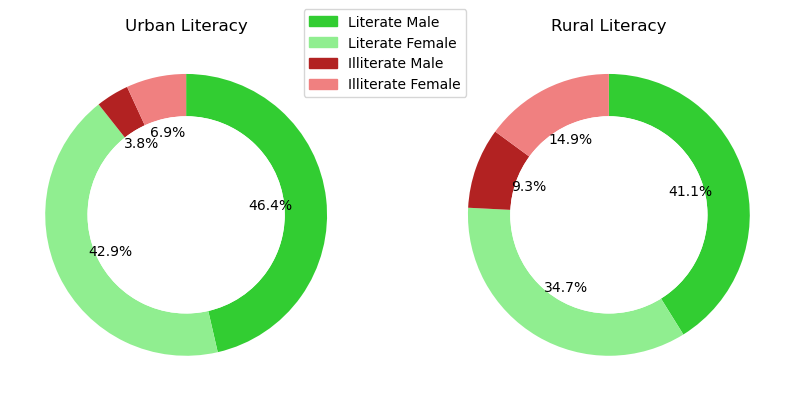

In [9]:
# extracting relevant data for the donut charts
urban_data = literacy[['literate_male_urban', 'literate_female_urban', 'illiterate_male_urban', 'illiterate_female_urban']].sum()
rural_data = literacy[['literate_male_rural', 'literate_female_rural', 'illiterate_male_rural', 'illiterate_female_rural']].sum()

# assigning color-palette-friendly colors for literate and illiterate (matching iranian flagm)
colors_literate = ['limegreen', 'lightgreen']
colors_illiterate = ['firebrick', 'lightcoral']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# urban plot
wedges_urban, texts_urban, autotexts_urban = ax[0].pie(urban_data, autopct='%1.1f%%', startangle=90, colors=colors_literate + colors_illiterate, wedgeprops=dict(width=0.3), counterclock=False)
centre_circle_urban = plt.Circle((0, 0), 0.70, fc='white')
ax[0].add_artist(centre_circle_urban)
ax[0].set_title('Urban Literacy')

# rural plot
wedges_rural, texts_rural, autotexts_rural = ax[1].pie(rural_data, autopct='%1.1f%%', startangle=90, colors=colors_literate + colors_illiterate, wedgeprops=dict(width=0.3), counterclock=False)
centre_circle_rural = plt.Circle((0, 0), 0.70, fc='white')
ax[1].add_artist(centre_circle_rural)
ax[1].set_title('Rural Literacy')

# legend for both graphs
legend_labels = ['Literate Male', 'Literate Female', 'Illiterate Male', 'Illiterate Female']
legend_patches = [
    mpatches.Patch(color=color, label=label) for color, label in zip(colors_literate + colors_illiterate, legend_labels)
]
fig.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, 0.92))

plt.show()

#### Regression Model that predicts the literacy of urban and rural regions:

Model Analysis:

With an R2 value of 0.996, the rural regression model represents 99.6% of the data's variability. This is extremely close to 1, making it a very strong model for prediction. Both the total rural population and its gender composition significantly influence the literate rural population.

With an R2 value of 0.999, the urban regression model represents 99.9% of the data's variability. This is even closer to 1, meaning this model's predictive power is much stronger. It tells us that the literate urban population is highly influenced by the total urban population, with minimal impact from gender composition.

Summary for Rural Model:
                             OLS Regression Results                            
Dep. Variable:     literate_both_rural   R-squared:                       0.996
Model:                             OLS   Adj. R-squared:                  0.995
Method:                  Least Squares   F-statistic:                     1598.
Date:                 Sun, 10 Dec 2023   Prob (F-statistic):           3.00e-17
Time:                         22:03:24   Log-Likelihood:                -232.80
No. Observations:                   17   AIC:                             471.6
Df Residuals:                       14   BIC:                             474.1
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
c

/Users/kianashah/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/kianashah/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


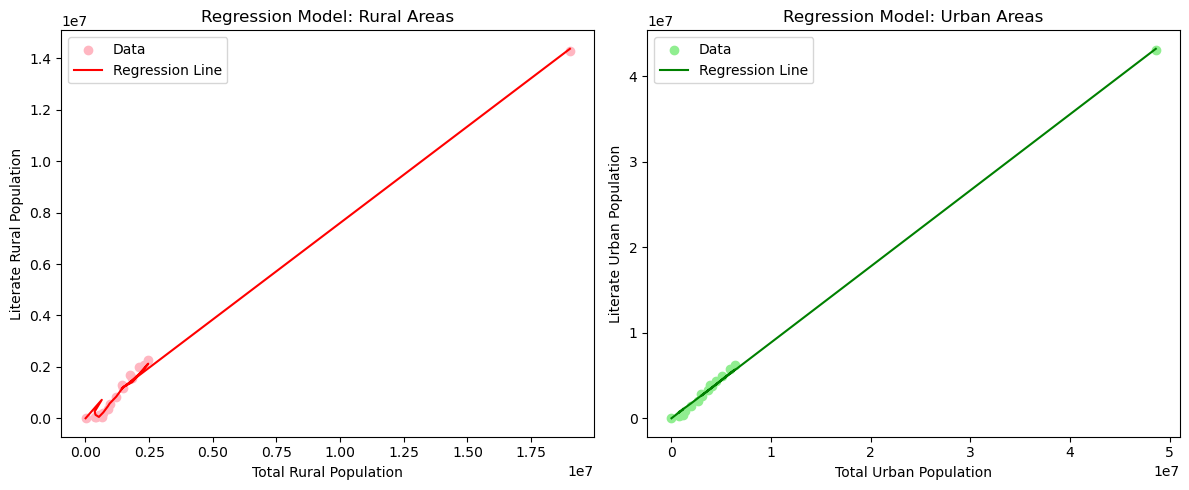

In [11]:
# defining the rural independent variables
X_rural = literacy[['total_male_rural', 'total_female_rural', 'total_both_rural']]
X_rural = sm.add_constant(X_rural)  # Add a constant term
y_rural = literacy['literate_both_rural']

# rural regression model
model_rural = sm.OLS(y_rural, X_rural).fit()

# printing the summary for rural model
print("Summary for Rural Model:")
print(model_rural.summary())

# defining urban independent variables
X_urban = literacy[['total_male_urban', 'total_female_urban', 'total_both_urban']]
X_urban = sm.add_constant(X_urban)  # Add a constant term
y_urban = literacy['literate_both_urban']

# urban regression model
model_urban = sm.OLS(y_urban, X_urban).fit()

# printing the summary for urban model
print("\nSummary for Urban Model:")
print(model_urban.summary())

# organizing the subplots for rural and urban side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# scatter plot for rural
axs[0].scatter(literacy['total_both_rural'], literacy['literate_both_rural'], color='lightpink', label='Data')
axs[0].plot(literacy['total_both_rural'], model_rural.predict(X_rural), color='red', label='Regression Line')
axs[0].set_xlabel('Total Rural Population')
axs[0].set_ylabel('Literate Rural Population')
axs[0].set_title('Regression Model: Rural Areas')
axs[0].legend()

# scatter plot for urban
axs[1].scatter(literacy['total_both_urban'], literacy['literate_both_urban'], color='lightgreen', label='Data')
axs[1].plot(literacy['total_both_urban'], model_urban.predict(X_urban), color='green', label='Regression Line')
axs[1].set_xlabel('Total Urban Population')
axs[1].set_ylabel('Literate Urban Population')
axs[1].set_title('Regression Model: Urban Areas')
axs[1].legend()

plt.tight_layout()
plt.show()